<a href="https://colab.research.google.com/github/ShaunCFernando/AI_Summer_Pitt/blob/main/AISummerSchool_2025_Supplementary_Day_2_ImageFiltering_and_Segmentation_OpenCV_GoogleColab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2  # OpenCV (Open Computer Vision)
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

In [6]:
original_img = cv2.imread('/content/drive/My Drive/AISummerSchool2025/pitt.png')

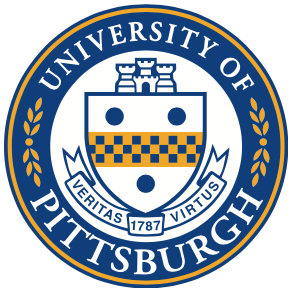

In [7]:
original_img.shape
cv2_imshow(original_img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

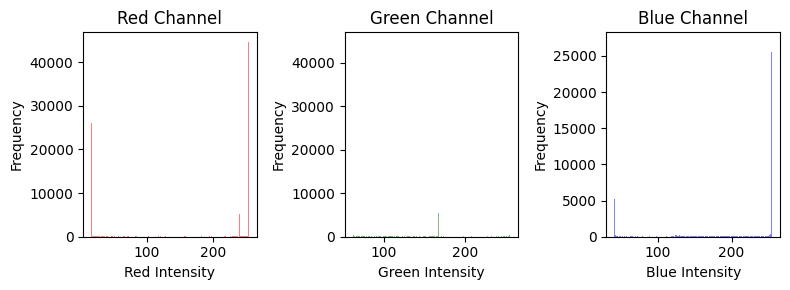

In [8]:
# Histogtam
# Convert BGR to RGB
image_rgb = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)

# Split the image into its RGB channels
r, g, b = cv2.split(image_rgb)

# Plot histograms for each channel
plt.figure(figsize=(8, 3))

plt.subplot(1, 3, 1)
plt.hist(r.ravel(), color='r', bins=256, alpha=0.5)
plt.xlabel('Red Intensity')
plt.ylabel('Frequency')
plt.title('Red Channel')

plt.subplot(1, 3, 2)
plt.hist(g.ravel(), color='g', bins=256, alpha=0.5)
plt.xlabel('Green Intensity')
plt.ylabel('Frequency')
plt.title('Green Channel')

plt.subplot(1, 3, 3)
plt.hist(b.ravel(), color='b', bins=256, alpha=0.5)
plt.xlabel('Blue Intensity')
plt.ylabel('Frequency')
plt.title('Blue Channel')

plt.tight_layout()
plt.show()

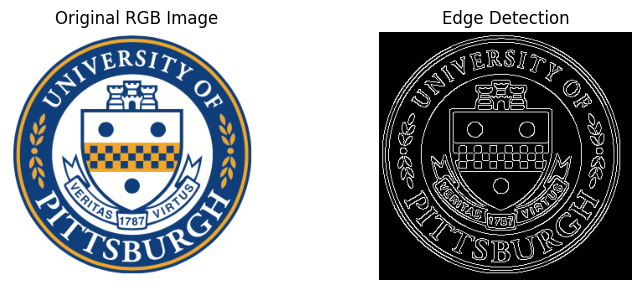

In [9]:
# Edge detectiom using Canny algorithm

gray_image = cv2.cvtColor(image_rgb, cv2.COLOR_BGR2GRAY)

# Apply Canny edge detection
# Adjust thresholds as needed
edges = cv2.Canny(gray_image, threshold1=10, threshold2=20)

# Display the original RGB image and the detected edges
plt.figure(figsize=(8, 3))

plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Original RGB Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title('Edge Detection')
plt.axis('off')

plt.tight_layout()
plt.show()

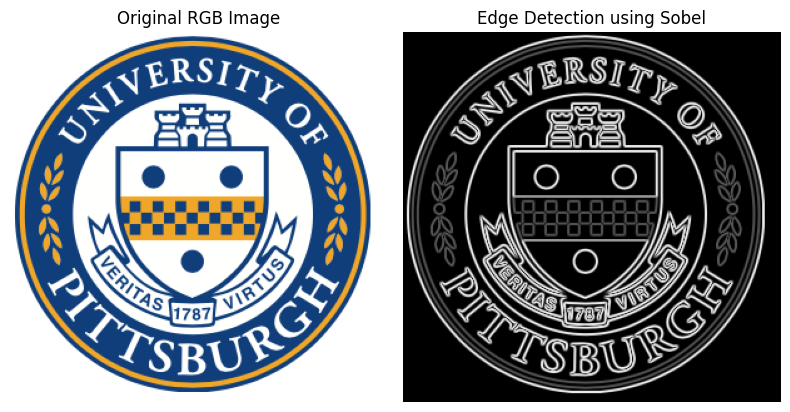

In [10]:
# Edge detection using Sobel algorithm

gray_image = cv2.cvtColor(image_rgb, cv2.COLOR_BGR2GRAY)

# Apply Sobel edge detection
sobel_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)

# Combine the horizontal and vertical edges
sobel_edges = np.sqrt(sobel_x ** 2 + sobel_y ** 2)

# Display the original RGB image and the detected edges using Sobel
plt.figure(figsize=(8, 35))

plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Original RGB Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(sobel_edges, cmap='gray')
plt.title('Edge Detection using Sobel')
plt.axis('off')

plt.tight_layout()
plt.show()

In [12]:
knee_img = cv2.imread('/content/drive/My Drive/AISummerSchool2025/knee_lateral.jpeg')
height, width, channels = knee_img.shape

# Print the dimensions
print("Width:", width)
print("Height:", height)
print("Number of channels:", channels)

Width: 451
Height: 630
Number of channels: 3


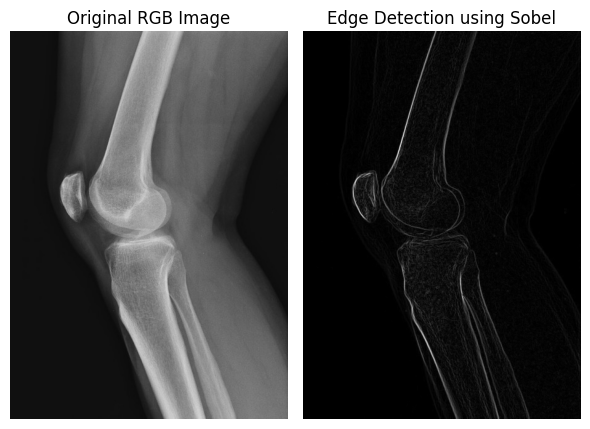

In [13]:
# Edge detection of the knee radiograph using Sobel algorithm

gray_image = cv2.cvtColor(knee_img, cv2.COLOR_BGR2GRAY)

# Apply Sobel edge detection
sobel_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)

# Combine the horizontal and vertical edges
sobel_edges = np.sqrt(sobel_x ** 2 + sobel_y ** 2)

# Display the original RGB image and the detected edges using Sobel
plt.figure(figsize=(6, 25))

plt.subplot(1, 2, 1)
plt.imshow(knee_img)
plt.title('Original RGB Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(sobel_edges, cmap='gray')
plt.title('Edge Detection using Sobel')
plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
#Image Segmentation

In [16]:
img = cv2.imread('/content/drive/My Drive/AISummerSchool2025/sample.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

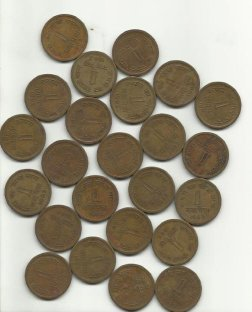

In [17]:
cv2_imshow(img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

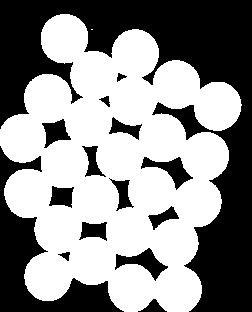

In [18]:
cv2_imshow(thresh)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [20]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)

# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers+1

# Now, mark the region of unknown with zero
markers[unknown==255] = 0
markers = cv2.watershed(img,markers)
img[markers == -1] = [0,0,255]

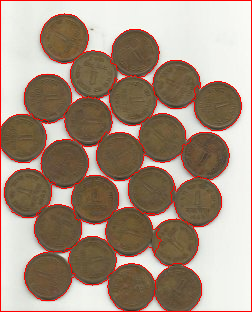

In [25]:
# Display the segmented image
cv2_imshow(img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [35]:
import cv2
import numpy as np

# Load the image
# image = cv2.imread(img)
img = cv2.imread('/content/drive/My Drive/AISummerSchool2025/sample.jpg')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#subtract one from background
num_coins = markers - 1

print(f"Number of coins detected: {num_coins}")



Number of coins detected: [[-2 -2 -2 ... -2 -2 -2]
 [-2  0  0 ...  0  0 -2]
 [-2  0  0 ...  0  0 -2]
 ...
 [-2  0  0 ...  0  0 -2]
 [-2  0  0 ...  0  0 -2]
 [-2 -2 -2 ... -2 -2 -2]]


In [34]:
import numpy as np

# Count unique regions (labels > 1 are object labels)
unique_labels = np.unique(markers)
coin_labels = unique_labels[unique_labels > 1]  # Ignore background (label 1) and borders (often -1 or 0)
num_coins = len(coin_labels)

print(f"Number of coins detected: {num_coins}")


Number of coins detected: 24
